In [ ]:
! pip install kaggle


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download tawsifurrahman/covid19-radiography-database

100% 745M/745M [00:06<00:00, 137MB/s]



In [ ]:
! unzip /content/covid19-radiography-database.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6710.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6711.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6712.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6713.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6714.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6715.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6716.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6717.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6718.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6719.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-672.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6720.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6721.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6722.png  
  inflating:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPooling2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout


from sklearn.metrics import classification_report,confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout

import tensorflow as tf

import cv2
import os

import numpy as np


In [ ]:
os.mkdir("/content/Disease")
os.mkdir("/content/Disease/COVID")
os.mkdir("/content/Disease/LUNG_OPACITY")
os.mkdir("/content/Disease/Normal")
os.mkdir("/content/Disease/Pneumonia")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import load_model
model1 = load_model('/content/drive/MyDrive/Bone_supression_research/Models/bonesup3.h5')


In [ ]:
trainer=ImageDataGenerator(rescale=1/255,shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
covid =trainer.flow_from_directory(
        "/content/COVID-19_Radiography_Dataset",
        target_size=(256, 256),
        batch_size=32,
        class_mode='categorical',classes=["COVID"])

lung =trainer.flow_from_directory(
        "/content/COVID-19_Radiography_Dataset",
        target_size=(256, 256),
        batch_size=32,
        class_mode='categorical',classes=["Lung_Opacity"])
Normal=trainer.flow_from_directory(
        "/content/COVID-19_Radiography_Dataset",
        target_size=(256, 256),
        batch_size=32,
        class_mode='categorical',classes=["Normal"])
pneumonia=trainer.flow_from_directory(
        "/content/COVID-19_Radiography_Dataset",
        target_size=(256, 256),
        batch_size=32,
        class_mode='categorical',classes=["Viral Pneumonia"])

Found 3616 images belonging to 1 classes.
Found 6012 images belonging to 1 classes.
Found 10192 images belonging to 1 classes.
Found 1345 images belonging to 1 classes.


In [ ]:
covid.image_shape

(256, 256, 3)

In [ ]:


pred_covid=model1.predict(covid)
pred_lung=model1.predict(lung)
pred_normal=model1.predict(Normal)
pred_pneumonia=model1.predict(pneumonia)

(256, 256, 1)


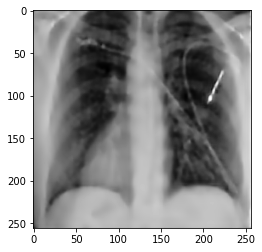

(256, 256, 1)


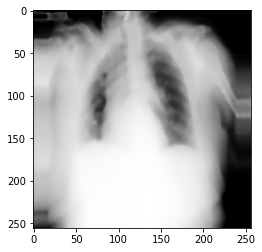

(256, 256, 1)


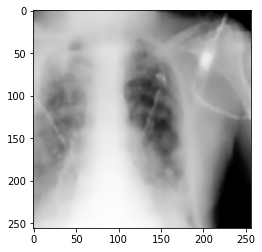

(256, 256, 1)


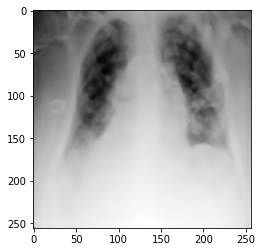

(256, 256, 1)


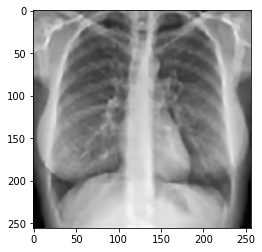

(256, 256, 1)


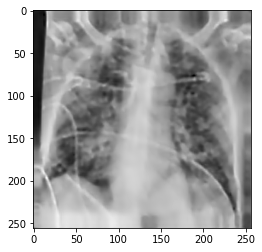

(256, 256, 1)


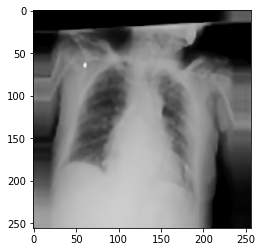

(256, 256, 1)


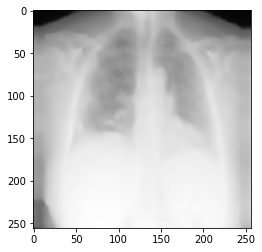

(256, 256, 1)


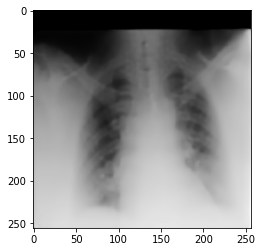

(256, 256, 1)


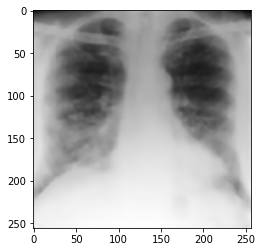

In [ ]:



for i in range(10):
    print(pred_covid[i].shape)
    plt.imshow(pred_covid[i].reshape(256,256))
    
    plt.gray()
    plt.show()

In [ ]:



folder= "/content/COVID-19_Radiography_Dataset/COVID"#Dataset folder

c=0
for filename in os.listdir(folder):
    img = pred_covid[c]
    
    
    c+=1
    
    
    
    
    
    
    if img is not None:
        temp3=os.path.join('/content/Disease/COVID',filename)
        
        cv2.imwrite(temp3,img*255)
        



In [ ]:
folder= "/content/COVID-19_Radiography_Dataset/Lung_Opacity"#Dataset folder

c=0
for filename in os.listdir(folder):
    img = pred_lung[c]
    c+=1
    
    
    if img is not None:
        
        
        temp3=os.path.join('/content/Disease/LUNG_OPACITY',filename)
        
        cv2.imwrite(temp3,img*255)


In [ ]:
folder= "/content/COVID-19_Radiography_Dataset/Normal"#Dataset folder

c=0
for filename in os.listdir(folder):
    img = pred_normal[c]
    c+=1 
    
    
    
    if img is not None:
        
        
        temp3=os.path.join('/content/Disease/Normal',filename)
        
        cv2.imwrite(temp3,img*255)


In [ ]:
folder= "/content/COVID-19_Radiography_Dataset/Viral Pneumonia"#Dataset folder

c=0
for filename in os.listdir(folder):
    img = pred_pneumonia[c]
    c+=1
    
    if img is not None:
        
        
        temp3=os.path.join('/content/Disease/Pneumonia',filename)
        
        cv2.imwrite(temp3,img*255)


In [ ]:
!zip -r /content/predictedimg.zip /content/Disease

Streaming output truncated to the last 5000 lines.
  adding: content/Disease/LUNG_OPACITY/Lung_Opacity-4520.png (deflated 2%)
  adding: content/Disease/LUNG_OPACITY/Lung_Opacity-3309.png (deflated 4%)
  adding: content/Disease/LUNG_OPACITY/Lung_Opacity-4209.png (deflated 3%)
  adding: content/Disease/LUNG_OPACITY/Lung_Opacity-3662.png (deflated 4%)
  adding: content/Disease/LUNG_OPACITY/Lung_Opacity-5028.png (deflated 3%)
  adding: content/Disease/LUNG_OPACITY/Lung_Opacity-3614.png (deflated 2%)
  adding: content/Disease/LUNG_OPACITY/Lung_Opacity-4370.png (deflated 7%)
  adding: content/Disease/LUNG_OPACITY/Lung_Opacity-4337.png (deflated 2%)
  adding: content/Disease/LUNG_OPACITY/Lung_Opacity-2259.png (deflated 3%)
  adding: content/Disease/LUNG_OPACITY/Lung_Opacity-4035.png (deflated 2%)
  adding: content/Disease/LUNG_OPACITY/Lung_Opacity-4343.png (deflated 2%)
  adding: content/Disease/LUNG_OPACITY/Lung_Opacity-1874.png (deflated 3%)
  adding: content/Disease/LUNG_OPACITY/Lung_Opaci

In [ ]:
from google.colab import files
files.download("/content/predictedimg.zip")